In [ ]:
!pip install numpy pandas tensorflow keras matplotlib seaborn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import os

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)  # Reshaping for CNN
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Create validation data from training data (10%)
val_split = 0.1
val_size = int(len(X_train) * val_split)

X_val = X_train[:val_size]
y_val = y_train[:val_size]
X_train = X_train[val_size:]
y_train = y_train[val_size:]

In [ ]:
# Data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [ ]:
# Callbacks
checkpoint_path = 'best_model.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True)
]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7679 - loss: 0.7172

844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.7681 - loss: 0.7165 - val_accuracy: 0.9735 - val_loss: 0.0927
Epoch 2/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9515 - loss: 0.1618

844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9515 - loss: 0.1618 - val_accuracy: 0.9773 - val_loss: 0.0740
Epoch 3/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9633 - loss: 0.1200

844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9633 - loss: 0.1200 - val_accuracy: 0.9782 - val_loss: 0.0690
Epoch 4/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9687 - loss: 0.1001

844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9687 - loss: 0.1001 - val_accuracy: 0.9850 - val_loss: 0.0475
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 54ms/step - accuracy: 0.9731 - loss: 0.0844 - val_accuracy: 0.9837 - val_loss: 0.0533
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9771 - loss: 0.0747 - val_accuracy: 0.9843 - val_loss: 0.0527
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9773 - loss: 0.0700

844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9773 - loss: 0.0700 - val_accuracy: 0.9867 - val_loss: 0.0467
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9806 - loss: 0.0638 - val_accuracy: 0.9832 - val_loss: 0.0565
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9808 - loss: 0.0611

844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.9808 - loss: 0.0611 - val_accuracy: 0.9873 - val_loss: 0.0404
Epoch 10/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9827 - loss: 0.0571

844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9827 - loss: 0.0571 - val_accuracy: 0.9887 - val_loss: 0.0355
Epoch 11/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9823 - loss: 0.0566 - val_accuracy: 0.9863 - val_loss: 0.0457
Epoch 12/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9839 - loss: 0.0534 - val_accuracy: 0.9870 - val_loss: 0.0399
Epoch 13/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9840 - loss: 0.0495 - val_accuracy: 0.9877 - val_loss: 0.0397


In [ ]:
# Save final model
model.save('final_model.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9845 - loss: 0.0429
Test Accuracy: 98.86%


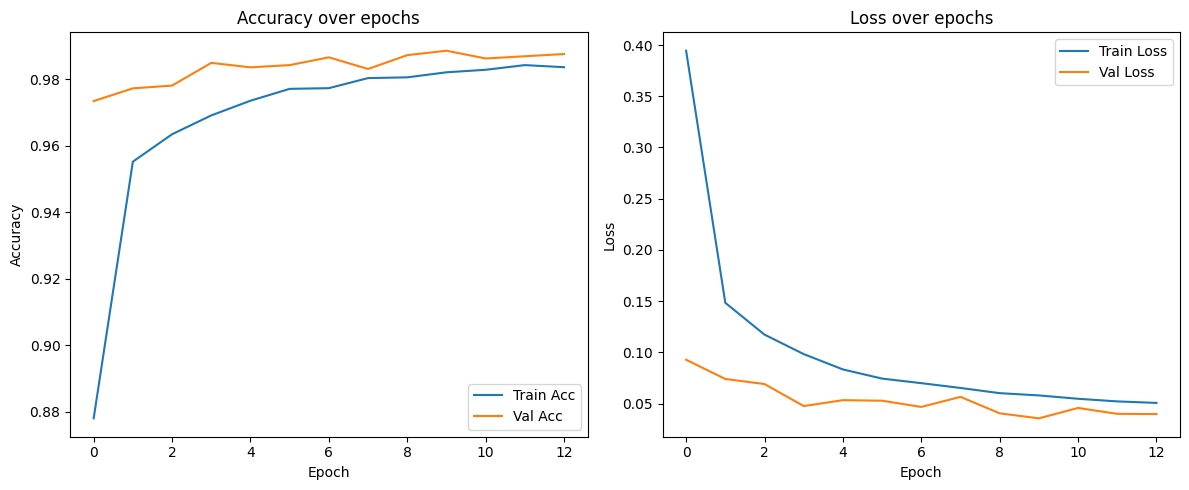

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


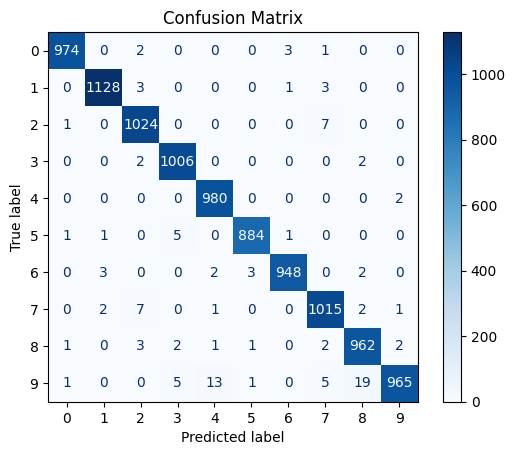

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()